From https://github.com/cottrell/ipynb/blob/894ee9409f71aeb477dc9b635f3d49bc48152028/ml/GP.ipynb

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist

class GP:
    """ (n, d)-array xtrain and an n-vector ytrain """
    def __init__(self, kernel, sigma=1.0):
        self.kernel = kernel
        self.sigma  = sigma
        self.predict = self.posterior
        self.fit = self.add_data
        
    def add_data(self, xtrain, ytrain):
        """ append data, update mu and K """
        self.xtrain = xtrain # hstack(self.xtrain, xtrain)
        self.ytrain = ytrain # hstack(self.ytrain, ytrain)
        self.K  = self.kernel(self.xtrain, self.xtrain)
        self.Ky = self.K + self.sigma ** 2 * np.eye(self.K.shape[0])
        
    def posterior(self, xtest):
        """ compute mu_star, K_star, sigma_star """
        Ks  = self.kernel(self.xtrain, xtest)
        Kss = self.kernel(xtest, xtest)
        
        Kyinv = np.linalg.inv(self.Ky)
        KKyT  = np.dot(Ks.T, Kyinv)
        
        mu = np.dot(KKyT, self.ytrain)
        Ss = Kss - np.dot(KKyT, Ks) 
        return mu, Ss
    
def sqexp_kernel(x1, x2, ell=.5, sf2=1.0):
    """ x1 and x2 of size (n, d) and (m, d) """
    d = dist.cdist(x1, x2, 'sqeuclidean')
    k = sf2 * np.exp(-0.5 * d / ell)
    return k

myGP = GP(sqexp_kernel, sigma=0.1)

In [7]:
m = 500
n = 30
X = np.random.normal(size=(m, n))
a = np.random.normal(size=n)
y = np.dot(X, a)
x = X[:,0]
X.shape, y.shape

((500, 30), (500,))

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


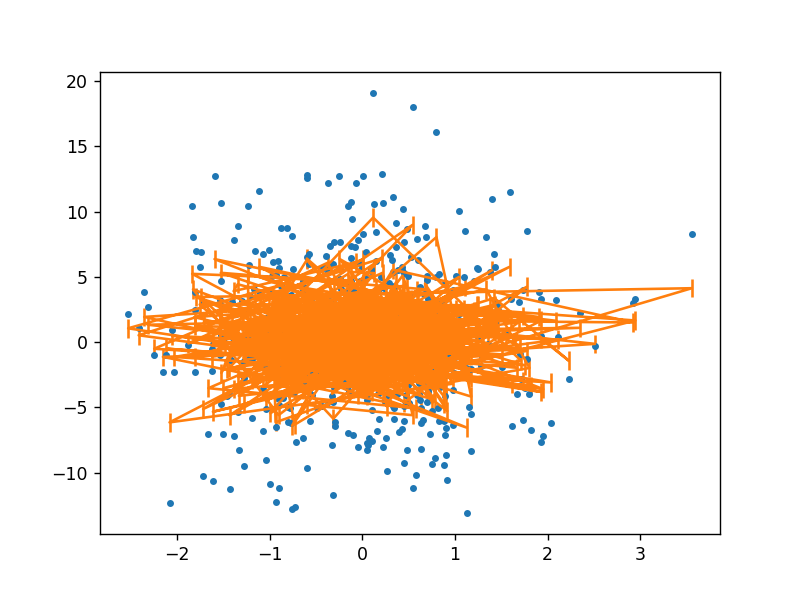

In [9]:
gp = GP(sqexp_kernel, sigma=1)
gp.add_data(X, y)

i = 0
xx = X[:,i].copy()
ia = xx.argsort()
# xx = np.atleast_2d(linspace(x.min(), x.max(), 30)).T
# yy = np.atleast_2d(linspace(y.min(), y.max(), 30)).T
yp, s2 = gp.posterior(X)
plt.plot(xx, y, '.')
plt.errorbar(xx, yp, yerr=np.sqrt(np.diag(s2)))
plt.show()

In [5]:
xx.shape, y.shape, yp.shape, s2.shape

((500,), (500,), (500,), (500, 500))